In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic= sns.load_dataset("titanic")

Survival Patterns

Questions:

Q-1: What percentage of passengers survived overall?

Q-2: How does survival rate differ by gender?

Q-3: How does survival rate vary across passenger classes (Pclass)?

Q-4: Did embarkation port (Embarked) affect survival?

Q-5: Are there interaction effects (e.g., gender × class)?

In [36]:
titanic.head()
titanic_survived= titanic["survived"].mean() *100

print(f"{titanic_survived:.2f}% passangers survived")

38.38% passangers survived


In [84]:
titanic_survied_gender= titanic.groupby(by="sex",observed=True).agg(survived_gender=("survived","mean"))*100
titanic_survied_gender

,survived_gender
sex,
female,74.203822
male,18.890815


In [85]:
titanic_survied_sex= titanic.groupby(by=["sex","survived"],observed=True).agg(total_count=("survived","count"))
print(titanic_survied_sex)

                 total_count
sex    survived             
female 0                  81
       1                 233
male   0                 468
       1                 109


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

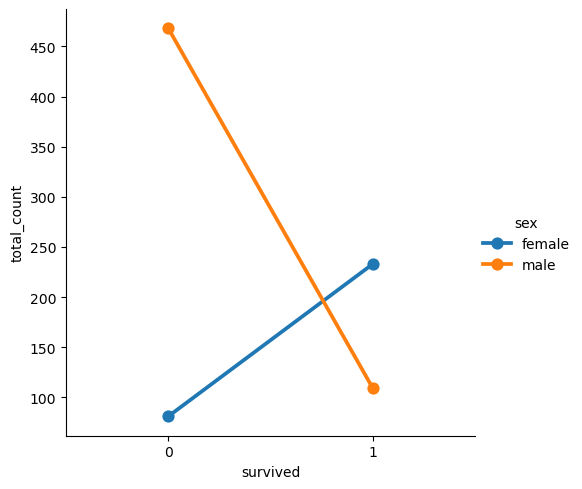

In [86]:
sns.catplot(data=titanic_survied_sex,hue="sex",y="total_count",kind="point",x="survived")
plt.plot

In [92]:
titanic_survived_class= titanic.groupby("class",observed=True)["survived"].mean()*100
print(titanic_survived_class)

class
First     62.962963
Second    47.282609
Third     24.236253
Name: survived, dtype: float64


In [96]:
for cls,percentage in titanic_survived_class.items():
    print(f"{percentage:.2f}","% passengers survived in",cls,"class.")

62.96 % passengers survived in First class.
47.28 % passengers survived in Second class.
24.24 % passengers survived in Third class.


In [97]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [128]:
titanic_survived_embarked= titanic.groupby("embarked",observed=True)["survived"].mean()*100
titanic_survived_embarked

embarked
C    55.357143
Q    38.961039
S    33.695652
Name: survived, dtype: float64

In [141]:
for index, value in titanic_survived_embarked.items():
    print(f"{value:.2f}","% passengers from",index,"emabarked are survived.")

55.36 % passengers from C emabarked are survived.
38.96 % passengers from Q emabarked are survived.
33.70 % passengers from S emabarked are survived.


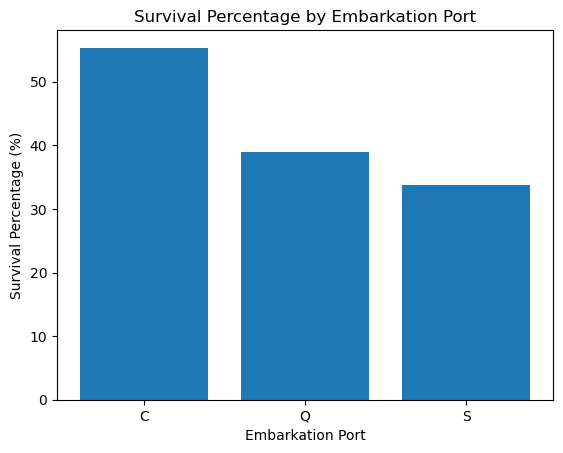

In [150]:
plt.bar(titanic_survived_embarked.index,titanic_survived_embarked.values)
plt.title("Survival Percentage by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Survival Percentage (%)")
plt.show()

In [163]:
titanic_survived_df= titanic.groupby(by=["sex","class"],observed=True,as_index=False)["survived"].mean()
print(titanic_survived_df)

      sex   class  survived
0  female   First  0.968085
1  female  Second  0.921053
2  female   Third  0.500000
3    male   First  0.368852
4    male  Second  0.157407
5    male   Third  0.135447


In [164]:
titanic_survived_df= pd.DataFrame(data= titanic_survived_df,columns=["sex","class","survived"])
titanic_survived_df["survived"]= titanic_survived_df["survived"]*100

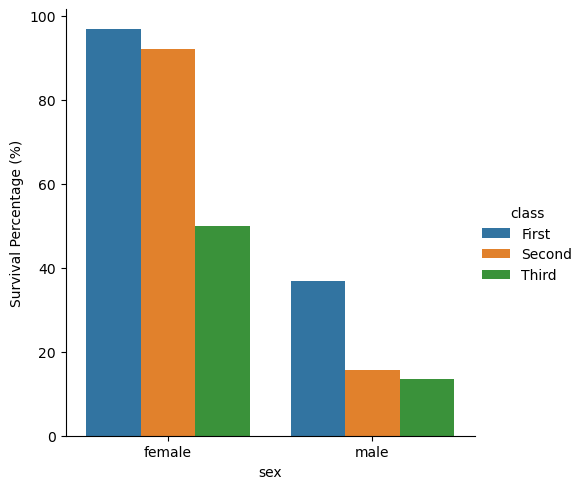

In [170]:
sns.catplot(kind="bar",data=titanic_survived_df,x="sex",y="survived",hue="class")
plt.ylabel("Survival Percentage (%)")
plt.show()